### Visualization

In [49]:
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import io

from google.colab import files
uploaded = files.upload()

csv_data_group_1 = pd.read_csv(io.StringIO(uploaded['data_final.csv'].decode('utf-8')))
csv_data_group_2 = pd.read_csv(io.StringIO(uploaded['data_final_2.csv'].decode('utf-8')))
influencers_dataframe = pd.read_csv(io.StringIO(uploaded['influencers_final.csv'].decode('utf-8')))

# Declare a list that is to be converted into a column
labels_for_group_1 = []
labels_for_group_2 = []
labels_for_group_3 = []

# Opening JSON file
output_json_group_1 = json.loads(uploaded['labeling_output.json'].decode('utf-8'))
output_json_group_2 = json.loads(uploaded['labeling_output_2.json'].decode('utf-8'))
output_json_group_3 = json.loads(uploaded['labeling_output_3.json'].decode('utf-8'))

ids_group_1 = []
ids_group_2 = []
ids_group_3 = []

for post in output_json_group_1:
    id = post.get("id")
    ids_group_1.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_1.append(label)

for post in output_json_group_2:
    id = post.get("id")
    ids_group_2.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_2.append(label)

for post in output_json_group_3:
    id = post.get("id")
    ids_group_3.append(id)
    annotations = post.get("annotations")
    if(not annotations[0].get("result")):
      label = "None"
    else:
      label = annotations[0].get("result")[0].get("value").get("choices")[0]
    labels_for_group_3.append(label)

label_and_id_df_1 = pd.DataFrame(
    {'id': ids_group_1,
     'label': labels_for_group_1
    })

label_and_id_df_2 = pd.DataFrame(
    {'id': ids_group_2,
     'label': labels_for_group_2
    })

label_and_id_df_3 = pd.DataFrame(
    {'id': ids_group_3,
     'label': labels_for_group_3
    })

label_and_id_df_1 = label_and_id_df_1.sort_values(by=['id'])
label_and_id_df_2 = label_and_id_df_2.sort_values(by=['id'])
label_and_id_df_3 = label_and_id_df_3.sort_values(by=['id'])

#appending 2 and 3 together
label_and_id_df_2_and_3 = label_and_id_df_2.append(label_and_id_df_3, ignore_index=True)

# print(label_and_id_df_1.head())
csv_data_group_1['label'] = label_and_id_df_1.label.values.tolist()
csv_data_group_2['label'] = label_and_id_df_2_and_3.label.values.tolist()

Saving data_final.csv to data_final (1).csv
Saving data_final_2.csv to data_final_2 (1).csv
Saving influencers_final.csv to influencers_final (1).csv
Saving labeling_output.json to labeling_output (1).json
Saving labeling_output_2.json to labeling_output_2 (1).json
Saving labeling_output_3.json to labeling_output_3 (1).json


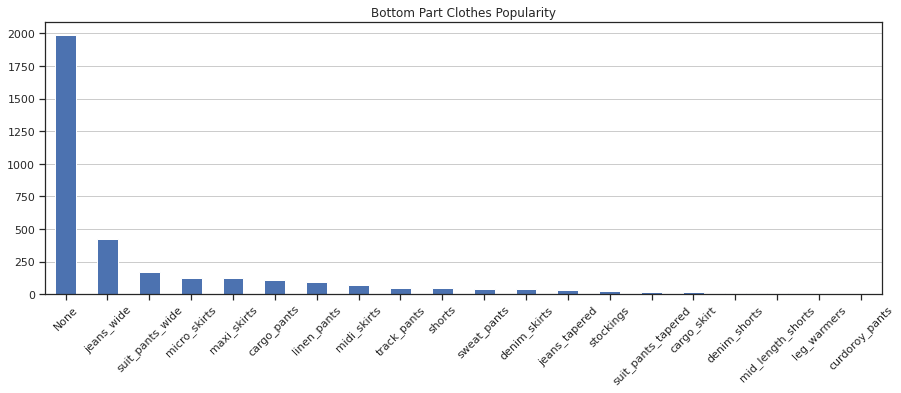

In [50]:
frames = [csv_data_group_1, csv_data_group_2]
combined_dataframe = pd.concat(frames).reset_index(drop=True)

combined_dataframe.label.value_counts().plot(title='Bottom Part Clothes Popularity',kind='bar', figsize=(15, 5))
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()

In [51]:
number_of_labels = combined_dataframe.groupby(['label'])['label'].count()
number_of_labels.to_frame()
number_of_labels = number_of_labels.to_frame(name='values')
number_of_labels

,values
label,
None,1986
cargo_pants,106
cargo_skirt,13
curdoroy_pants,3
denim_shorts,12
denim_skirts,36
jeans_tapered,29
jeans_wide,427
leg_warmers,5


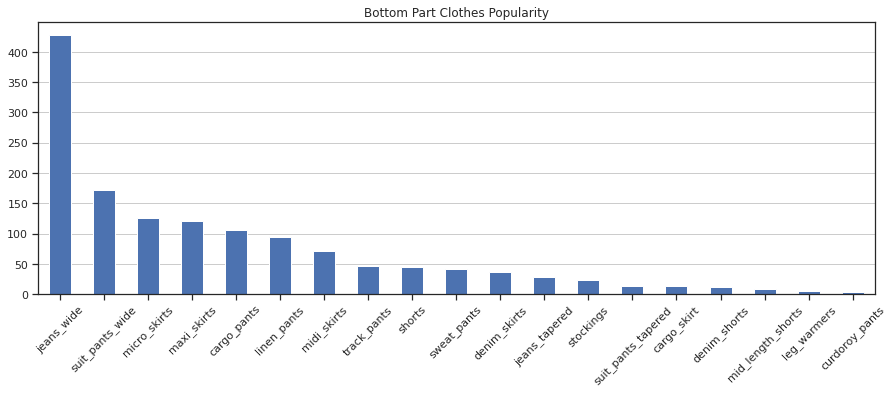

The ratio of pictures which do not have any relevant pants type 0.5879218472468917
The ratio of pictures which do  have any relevant pants type 0.41207815275310833


In [52]:
combined_dataframe_without_none = combined_dataframe[combined_dataframe['label'] != 'None']
combined_dataframe_without_none.label.value_counts().plot(title='Bottom Part Clothes Popularity',kind='bar', figsize=(15, 5))
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()
print(f'The ratio of pictures which do not have any relevant pants type', (len(combined_dataframe)- len(combined_dataframe_without_none))/ (len(combined_dataframe)))
print(f'The ratio of pictures which do  have any relevant pants type', (len(combined_dataframe_without_none))/ (len(combined_dataframe)))

In [53]:
linen_df = combined_dataframe.loc[(combined_dataframe['label'] == 'linen_pants'), ['label', 'date_time']]

In [54]:
linen_df_count = linen_df['date_time'].value_counts().sort_index().reset_index()
linen_df_count.columns = ['DATE','linen_pants_count']

In [55]:
import datetime as dt

linen_df_count['DATE'] = pd.to_datetime(linen_df_count['DATE'], format="%Y-%m-%d %H:%M:%S")
linen_df_count['linen_pants_count'] = linen_df_count['linen_pants_count'].astype('int')

linen_df_timeseries = linen_df_count.resample('M', on='DATE').linen_pants_count.sum().reset_index()
linen_df_timeseries.columns = ['DATE','linen_pants_count']
linen_df_timeseries['DATE'] = pd.to_datetime(linen_df_timeseries['DATE'], format='%m').dt.month_name()

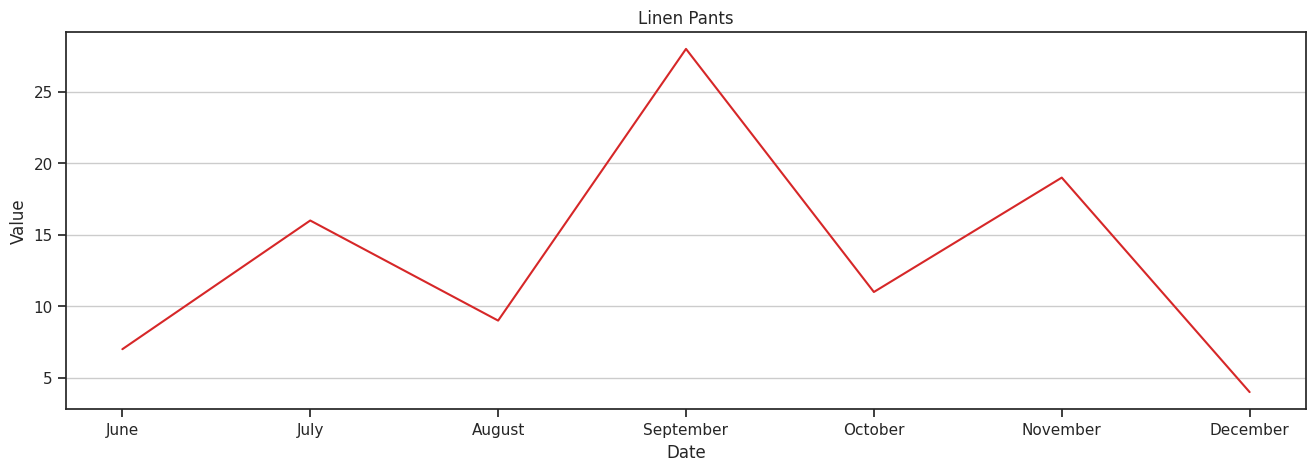

In [56]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(axis = 'y')
    plt.show()

plot_df(linen_df_timeseries, x=linen_df_timeseries.DATE, y=linen_df_timeseries.linen_pants_count, title='Linen Pants')    

In [57]:
import calendar
month_counts = combined_dataframe_without_none[['date_time', 'label']]
type(combined_dataframe_without_none['date_time'])
month_counts['month'] = pd.DatetimeIndex(combined_dataframe_without_none['date_time']).month
month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_abbr[x])
month_counts['month'] = month_counts['month'].astype("string")
month_counts = month_counts[['label','month']]

<ipython-input-57-37d5d2de5577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_counts['month'] = pd.DatetimeIndex(combined_dataframe_without_none['date_time']).month
<ipython-input-57-37d5d2de5577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_abbr[x])
<ipython-input-57-37d5d2de5577>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

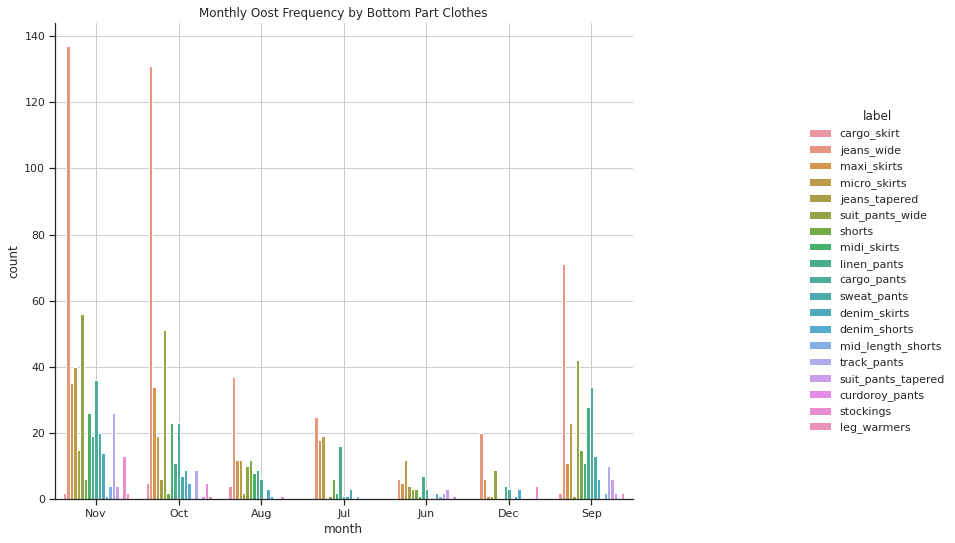

In [58]:
import seaborn as sns

sns.catplot(data=month_counts, kind='count',x='month',hue='label').set(title='Monthly Oost Frequency by Bottom Part Clothes')
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.gcf().set_size_inches(15, 8)

In [59]:
month_counts = month_counts.groupby(['month','label']).size().reset_index(name='counts')

In [60]:
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
month_order = month_counts.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

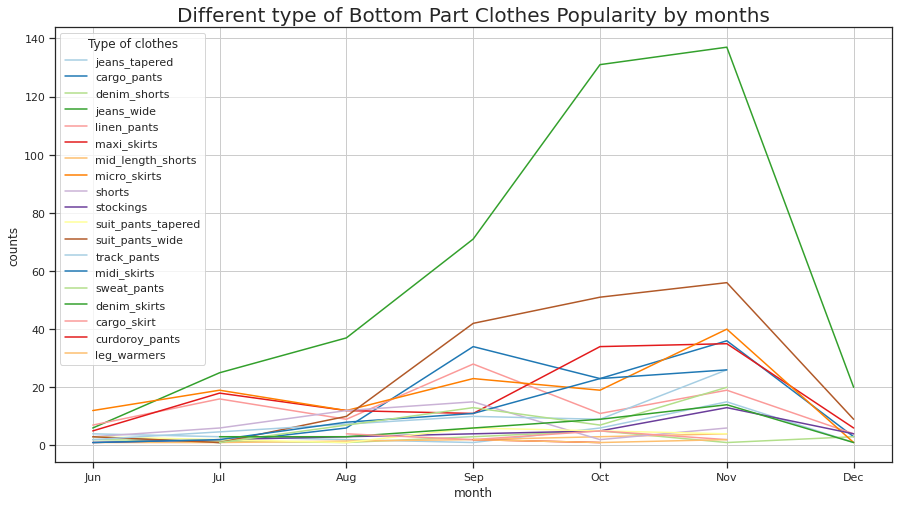

In [61]:
sns.lineplot(data=month_order, x="month", y="counts", hue="label", sort= False, palette="Paired")

plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.title("Different type of Bottom Part Clothes Popularity by months", fontsize=20)
plt.legend(loc='upper left', title='Type of clothes')
plt.gcf().set_size_inches(15, 8)

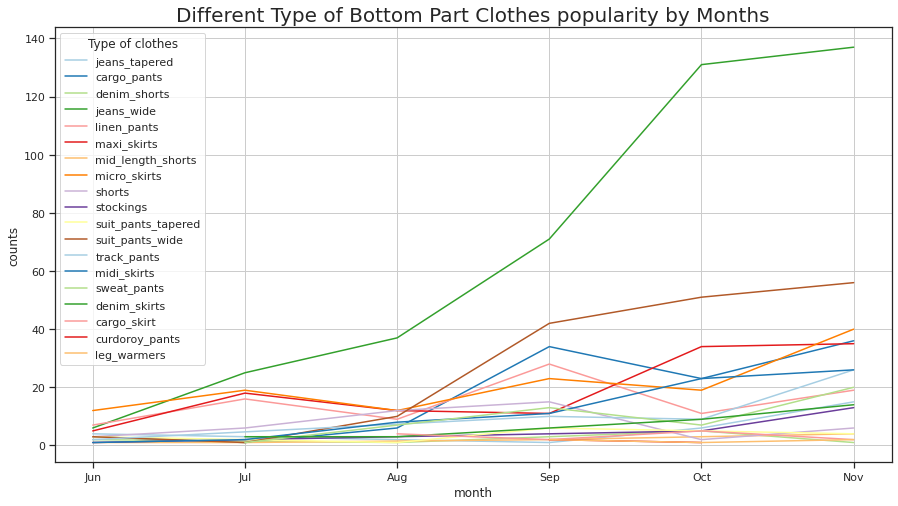

In [62]:
month_order_until_nov = month_counts.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))
month_order_until_nov = month_order_until_nov.drop(month_order_until_nov[month_order_until_nov.month == 'Dec'].index)

sns.lineplot(data=month_order_until_nov, x="month", y="counts", hue="label", sort= False, palette="Paired")
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.title("Different Type of Bottom Part Clothes popularity by Months", fontsize=20)
plt.legend(loc='upper left', title='Type of clothes')
plt.gcf().set_size_inches(15, 8)

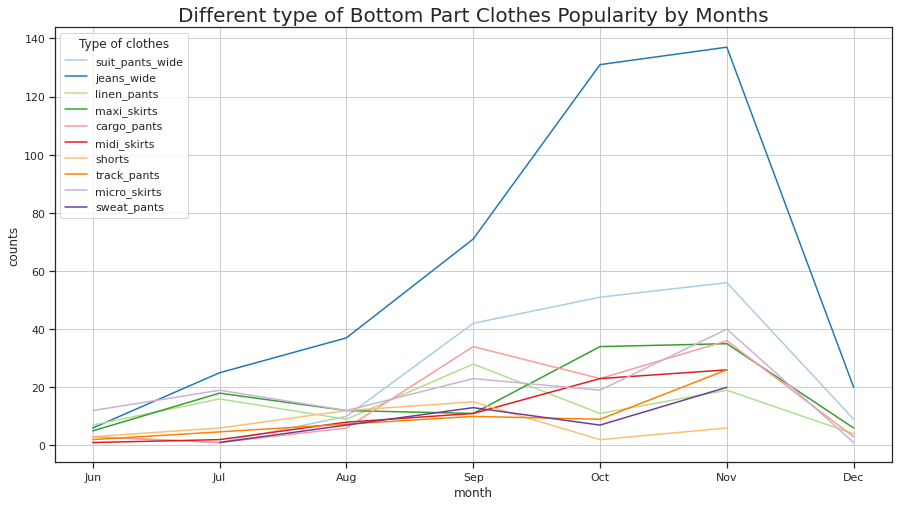

In [63]:
top_10_bottom_parts_list = ["jeans_wide", "suit_pants_wide", "micro_skirts", "maxi_skirts", "cargo_pants", "linen_pants", "midi_skirts", "track_pants", "shorts", "sweat_pants"]
top_10_bottom_parts_df = month_counts[(month_counts["label"].isin(top_10_bottom_parts_list))]
top_10_bottom_parts_df = top_10_bottom_parts_df.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

sns.lineplot(data=top_10_bottom_parts_df, x="month", y="counts", hue="label", sort= False, palette="Paired")
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.title("Different type of Bottom Part Clothes Popularity by Months", fontsize=20)
plt.legend(loc='upper left', title='Type of clothes')
plt.gcf().set_size_inches(15, 8)

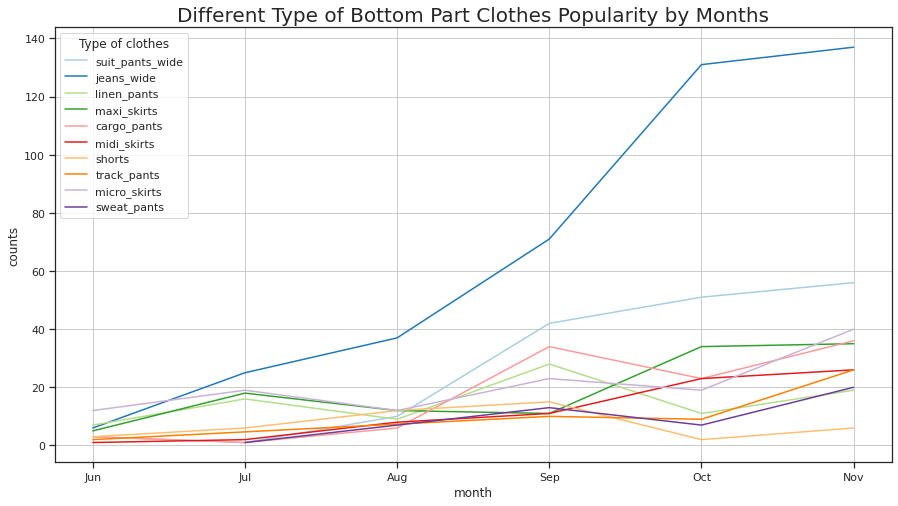

In [64]:
top_10_bottom_parts_df_until_dec = top_10_bottom_parts_df.drop(top_10_bottom_parts_df[top_10_bottom_parts_df.month == 'Dec'].index)

sns.lineplot(data=top_10_bottom_parts_df_until_dec, x="month", y="counts", hue="label", sort= False, palette="Paired")
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.title("Different Type of Bottom Part Clothes Popularity by Months", fontsize=20)
plt.legend(loc='upper left', title='Type of clothes')
plt.gcf().set_size_inches(15, 8)

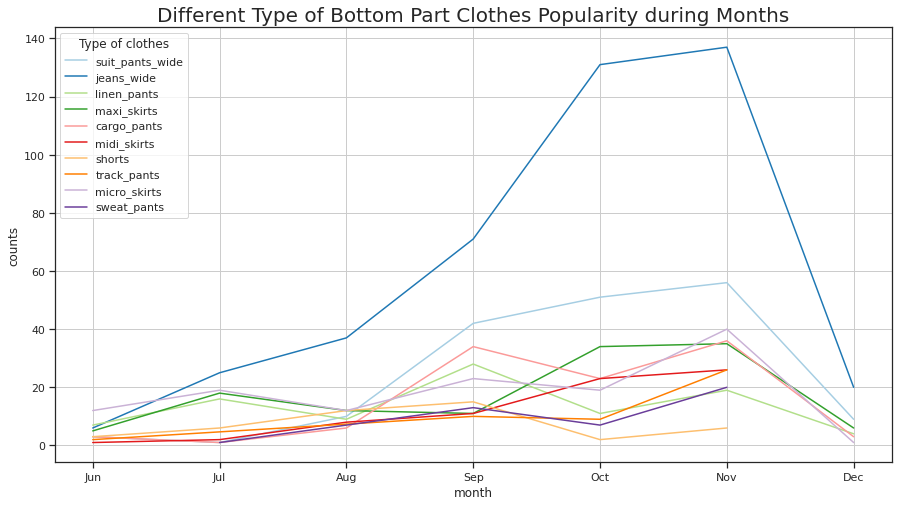

In [65]:
top_10_bottom_parts_list = ["jeans_wide", "suit_pants_wide", "micro_skirts", "maxi_skirts", "cargo_pants", "linen_pants", "midi_skirts", "track_pants", "shorts", "sweat_pants"]
top_10_bottom_parts_df = month_counts[(month_counts["label"].isin(top_10_bottom_parts_list))]


month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
top_10_bottom_parts_df = top_10_bottom_parts_df.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

sns.lineplot(data=top_10_bottom_parts_df, x="month", y="counts", hue="label", sort= False, palette="Paired")

plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.title("Different Type of Bottom Part Clothes Popularity during Months", fontsize=20)
plt.legend(loc='upper left', title='Type of clothes')
plt.gcf().set_size_inches(15, 8)

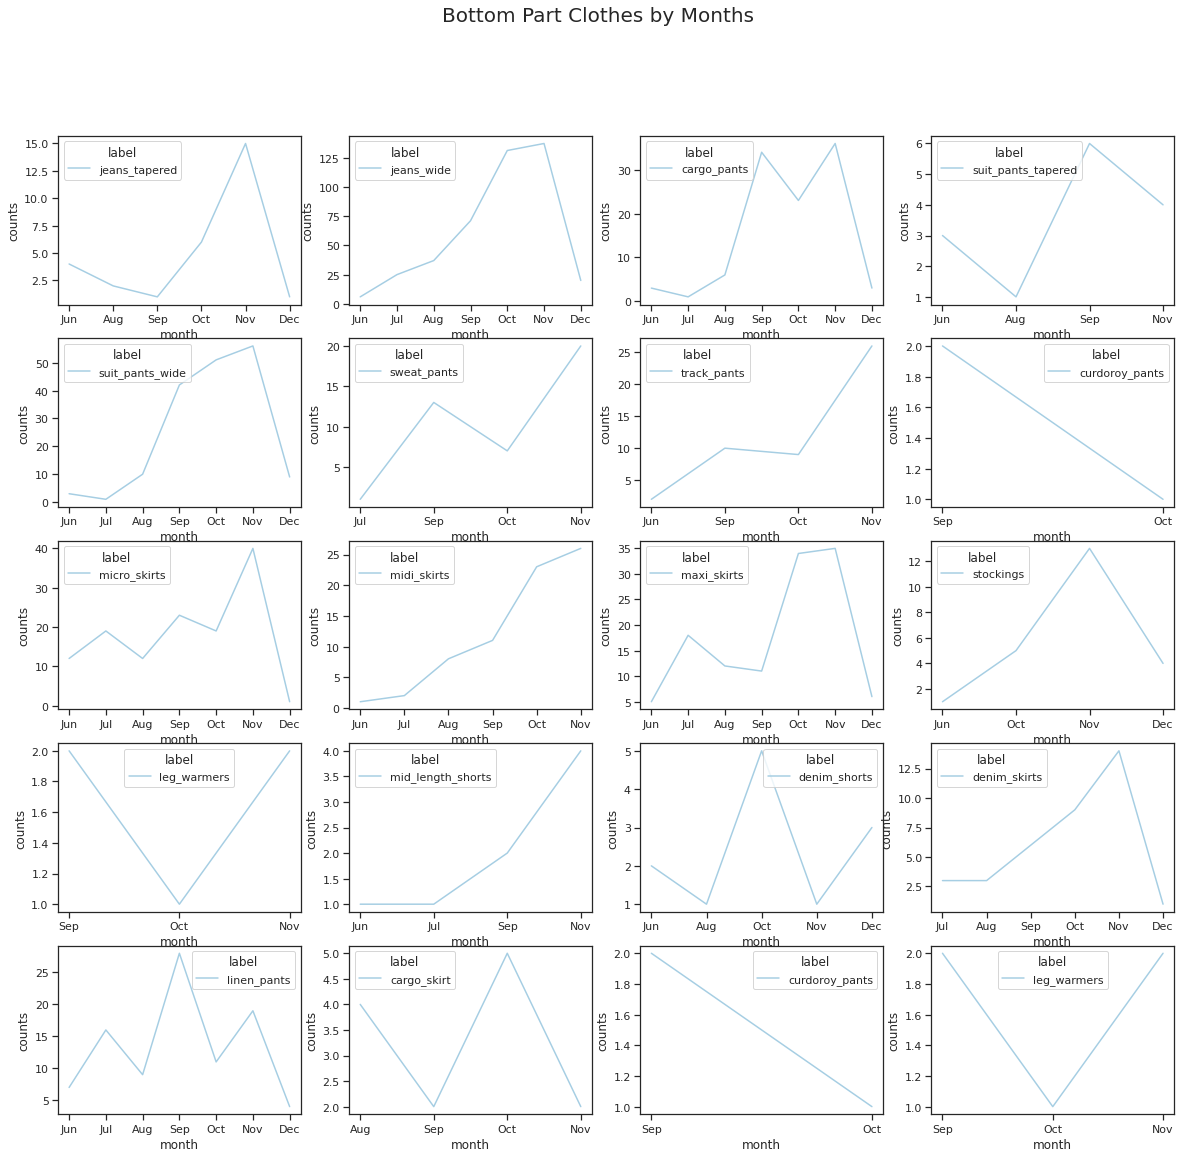

In [66]:
fig, axes = plt.subplots(5, 4, figsize=(20,18))

fig.suptitle('Bottom Part Clothes by Months', fontsize=20)
sns.set(style="ticks")

sns.lineplot(ax=axes[0, 0], data=month_order[month_order['label'] == 'jeans_tapered'], x='month', y='counts', hue="label",  palette="Paired")
sns.lineplot(ax=axes[0, 1], data=month_order[month_order['label'] == 'jeans_wide'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[0, 2], data=month_order[month_order['label'] == 'cargo_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[0, 3], data=month_order[month_order['label'] == 'suit_pants_tapered'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[1, 0], data=month_order[month_order['label'] == 'suit_pants_wide'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[1, 1], data=month_order[month_order['label'] == 'sweat_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[1, 2], data=month_order[month_order['label'] == 'track_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[1, 3], data=month_order[month_order['label'] == 'curdoroy_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[2, 0], data=month_order[month_order['label'] == 'micro_skirts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[2, 1], data=month_order[month_order['label'] == 'midi_skirts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[2, 2], data=month_order[month_order['label'] == 'maxi_skirts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[2, 3], data=month_order[month_order['label'] == 'stockings'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[3, 0], data=month_order[month_order['label'] == 'leg_warmers'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[3, 1], data=month_order[month_order['label'] == 'mid_length_shorts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[3, 2], data=month_order[month_order['label'] == 'denim_shorts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[3, 3], data=month_order[month_order['label'] == 'denim_skirts'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[4, 0], data=month_order[month_order['label'] == 'linen_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[4, 1], data=month_order[month_order['label'] == 'cargo_skirt'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[4, 2], data=month_order[month_order['label'] == 'curdoroy_pants'], x='month', y='counts', hue="label", palette="Paired")
sns.lineplot(ax=axes[4, 3], data=month_order[month_order['label'] == 'leg_warmers'], x='month', y='counts', hue="label", palette="Paired")

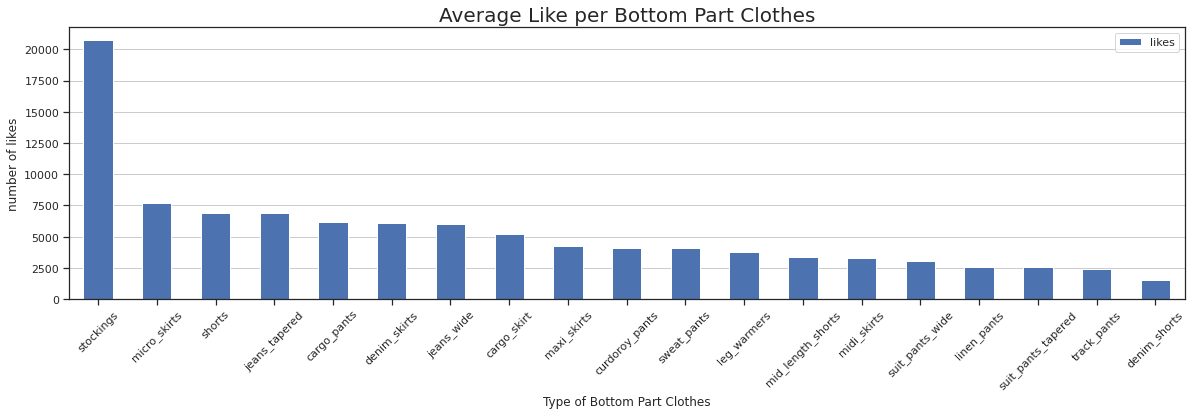

In [67]:
likes_and_labels_mean = combined_dataframe_without_none[['likes', 'label']]
likes_and_labels_mean = likes_and_labels_mean.groupby('label').mean()
likes_and_labels_mean = likes_and_labels_mean.sort_values('likes', ascending=False)

likes_and_labels_mean.plot(kind="bar", figsize=(20, 5))

plt.title("Average Like per Bottom Part Clothes", fontsize=20)
plt.xlabel("Type of Bottom Part Clothes")
plt.ylabel("number of likes")
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()

In [68]:
combined_dataframe_without_none

,Unnamed: 0,url,date_time,caption,likes,user_id,post_id,label
0,0,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-11-28 23:18:33,NaN,252,202803290,1,cargo_skirt
2,2,https://scontent-ams4-1.cdninstagram.com/v/t51...,2022-11-18 21:02:24,NaN,3,202803290,3,jeans_wide
3,3,https://instagram.fist6-3.fna.fbcdn.net/v/t51....,2022-11-08 22:07:18,shoes and shenanigans 👽🧚🏼‍♂️,3,202803290,4,maxi_skirts
6,6,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-11-08 22:07:18,shoes and shenanigans 👽🧚🏼‍♂️,3,202803290,4,jeans_wide
8,8,https://instagram.fist6-1.fna.fbcdn.net/v/t51....,2022-10-22 19:56:53,NaN,3,202803290,5,jeans_wide
...,...,...,...,...,...,...,...,...
3350,2062,https://scontent-ams4-1.cdninstagram.com/v/t51...,2022-07-14 20:33:00,"Hey everyone, look how cool my outfit is 😂",3,345869154,496,linen_pants
3353,2065,https://scontent-ams4-1.cdninstagram.com/v/t51...,2022-07-04 18:13:12,"Roskilde, thanks for the memories, new friends...",3,345869154,498,shorts
3366,2078,https://scontent-ams4-1.cdninstagram.com/v/t51...,2022-06-20 20:24:11,1 ⬆️ 1 ⬇️,3,345869154,500,suit_pants_wide
3367,2079,https://instagram.fist6-3.fna.fbcdn.net/v/t51....,2022-06-10 16:44:13,Swipe for smile 😁,3,345869154,501,suit_pants_wide


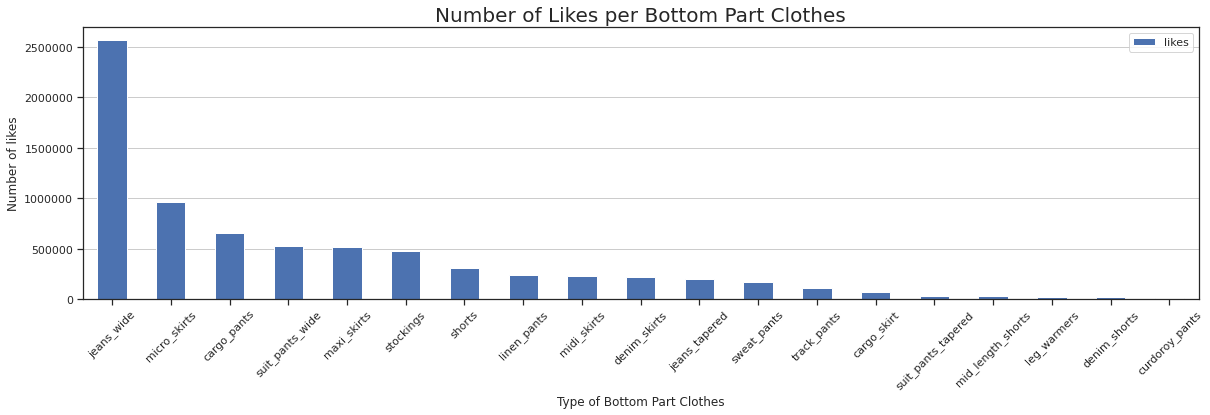

In [69]:
likes_and_labels_sum = combined_dataframe_without_none[['likes', 'label']]
likes_and_labels_sum = likes_and_labels_sum.groupby('label').sum()
likes_and_labels_sum = likes_and_labels_sum.sort_values('likes', ascending=False)
likes_and_labels_sum
likes_and_labels_sum.plot(kind="bar", figsize=(20, 5))

plt.title("Number of Likes per Bottom Part Clothes", fontsize=20)
plt.xlabel("Type of Bottom Part Clothes")
plt.ylabel("Number of likes")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

<ipython-input-70-f3ae6435904c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_per_month['month'] = pd.DatetimeIndex(combined_dataframe_without_none['date_time']).month
<ipython-input-70-f3ae6435904c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_per_month['month'] = post_per_month['month'].apply(lambda x: calendar.month_abbr[x])
<ipython-input-70-f3ae6435904c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

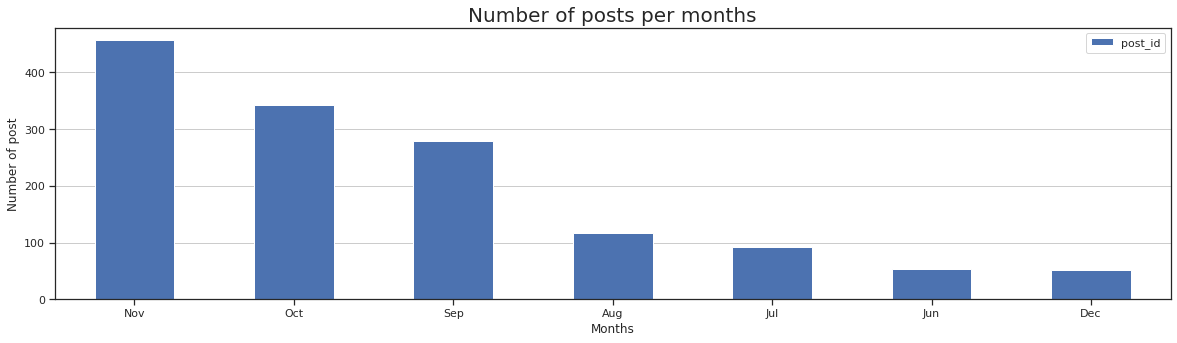

In [70]:
post_per_month = combined_dataframe_without_none[['post_id', 'date_time']]
post_per_month['month'] = pd.DatetimeIndex(combined_dataframe_without_none['date_time']).month
post_per_month['month'] = post_per_month['month'].apply(lambda x: calendar.month_abbr[x])
post_per_month['month'] = post_per_month['month'].astype("string")
post_per_month = post_per_month[['post_id','month']]

post_per_month = post_per_month.groupby('month').count()
post_per_month = post_per_month.sort_values('post_id', ascending=False)

post_per_month.plot(kind="bar", figsize=(20, 5))
plt.title("Number of posts per months",fontsize=20)
plt.xlabel("Months")
plt.ylabel("Number of post")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y')
plt.xticks(rotation = 0)
plt.show()

<ipython-input-71-80b9a966b66c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_per_day['Date'] = pd.to_datetime(post_per_day.date_time, format='%Y-%m-%d %H:%M:%S')
<ipython-input-71-80b9a966b66c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_per_day['Day'] = post_per_day['Date'].dt.day_name()


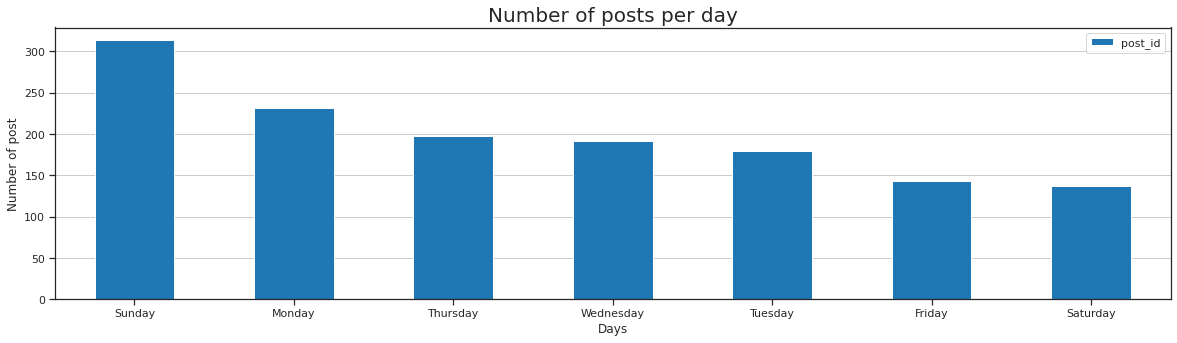

In [71]:
post_per_day = combined_dataframe_without_none[['post_id', 'date_time']]
post_per_day['Date'] = pd.to_datetime(post_per_day.date_time, format='%Y-%m-%d %H:%M:%S')
post_per_day['Day'] = post_per_day['Date'].dt.day_name()
post_per_day = post_per_day[['post_id', 'Day']]


post_per_day = post_per_day.groupby('Day').count()
post_per_day = post_per_day.sort_values('post_id', ascending=False)
post_per_day.plot(kind="bar", colormap='tab20', figsize=(20,5))
plt.title("Number of posts per day", fontsize=20)
plt.xlabel("Days")
plt.ylabel("Number of post")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y')
plt.xticks(rotation = 0)
plt.show()

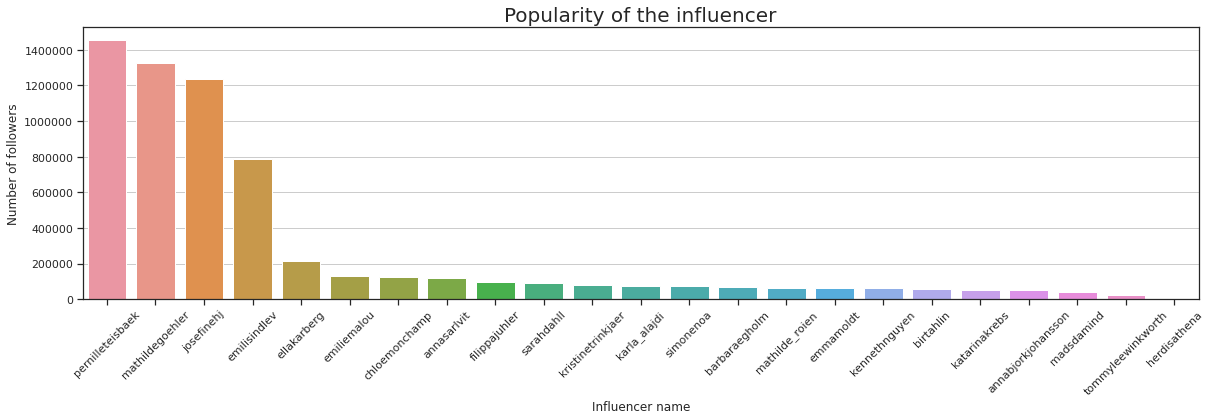

In [72]:
influencers_dataframe_popularity = influencers_dataframe[['insta_handle', 'follow_count']]
influencers_dataframe_popularity = influencers_dataframe_popularity.sort_values('follow_count', ascending=False)

plt_1 = plt.figure(figsize=(20, 5))
sns.barplot(x = 'insta_handle', y = 'follow_count', data = influencers_dataframe_popularity)
plt.title("Popularity of the influencer", fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.ylabel("Number of followers")
plt.xlabel("Influencer name")
plt.grid(axis = 'y')
plt.show()


In [73]:
influencer_and_post_combaine = pd.merge(combined_dataframe_without_none, influencers_dataframe, on="user_id")

<ipython-input-74-710f85c554dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influencer_and_post_combaine_devided_by_followers['likes/followers'] = influencer_and_post_combaine_devided_by_followers['likes'] / influencer_and_post_combaine_devided_by_followers['follow_count']


                    likes/followers
label                              
jeans_tapered              0.108479
shorts                     0.093877
jeans_wide                 0.064134
micro_skirts               0.050344
maxi_skirts                0.044554
cargo_skirt                0.043846
cargo_pants                0.041372
denim_skirts               0.040978
mid_length_shorts          0.039661
midi_skirts                0.033764
stockings                  0.032828
denim_shorts               0.031758
suit_pants_wide            0.030946
curdoroy_pants             0.029938
sweat_pants                0.028898
linen_pants                0.025627
track_pants                0.024129
suit_pants_tapered         0.020974
leg_warmers                0.010419


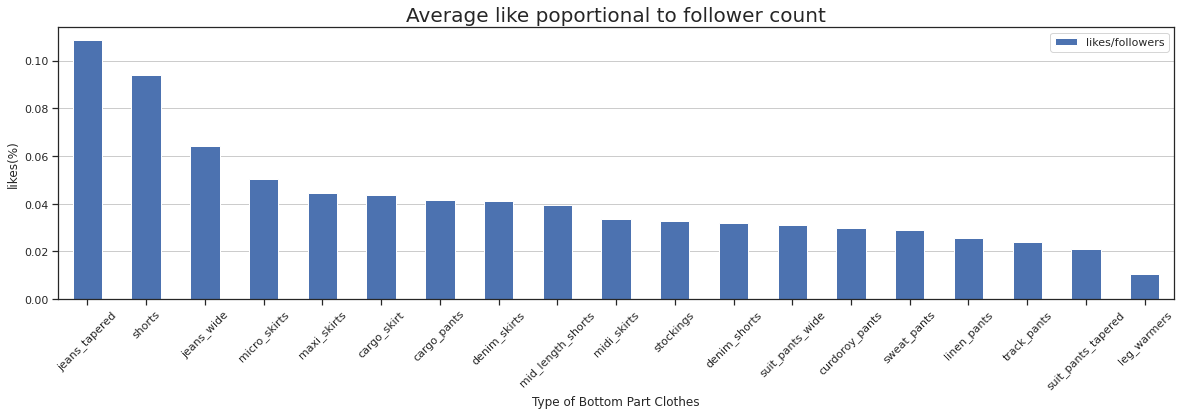

In [74]:
influencer_and_post_combaine_devided_by_followers = influencer_and_post_combaine[['likes', 'label', 'follow_count']]
influencer_and_post_combaine_devided_by_followers['likes/followers'] = influencer_and_post_combaine_devided_by_followers['likes'] / influencer_and_post_combaine_devided_by_followers['follow_count']
influencer_and_post_combaine_devided_by_followers = influencer_and_post_combaine_devided_by_followers.groupby('label').mean()
influencer_and_post_combaine_devided_by_followers
influencer_and_post_combaine_devided_by_followers = influencer_and_post_combaine_devided_by_followers.sort_values('likes/followers', ascending=False)
influencer_and_post_combaine_devided_by_followers = influencer_and_post_combaine_devided_by_followers[['likes/followers']]
influencer_and_post_combaine_devided_by_followers
influencer_and_post_combaine_devided_by_followers.plot(kind="bar", figsize=(20, 5))
print(influencer_and_post_combaine_devided_by_followers)
plt.title("Average like poportional to follower count", fontsize=20)
plt.xlabel("Type of Bottom Part Clothes")
plt.ylabel("likes(%)")
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()

In [75]:
likes_within_an_influencer_per_pants = influencer_and_post_combaine[['insta_handle', 'likes', 'label']]

In [76]:
pivot_for_likes_within_an_influencer_per_pants = pd.pivot_table(data=likes_within_an_influencer_per_pants , index=['insta_handle'], columns=['label'], values='likes')
pivot_for_likes_within_an_influencer_per_pants['sum']= pivot_for_likes_within_an_influencer_per_pants.sum(numeric_only=True,axis=1)
sorted_pivot_for_likes_within_an_influencer_per_pants = pivot_for_likes_within_an_influencer_per_pants.sort_values(by=['sum'], ascending=False)
sorted_pivot_for_likes_within_an_influencer_per_pants = sorted_pivot_for_likes_within_an_influencer_per_pants[sorted_pivot_for_likes_within_an_influencer_per_pants['sum'] >= 10000]
sorted_pivot_for_likes_within_an_influencer_per_pants = sorted_pivot_for_likes_within_an_influencer_per_pants.drop(['sum'], axis=1)

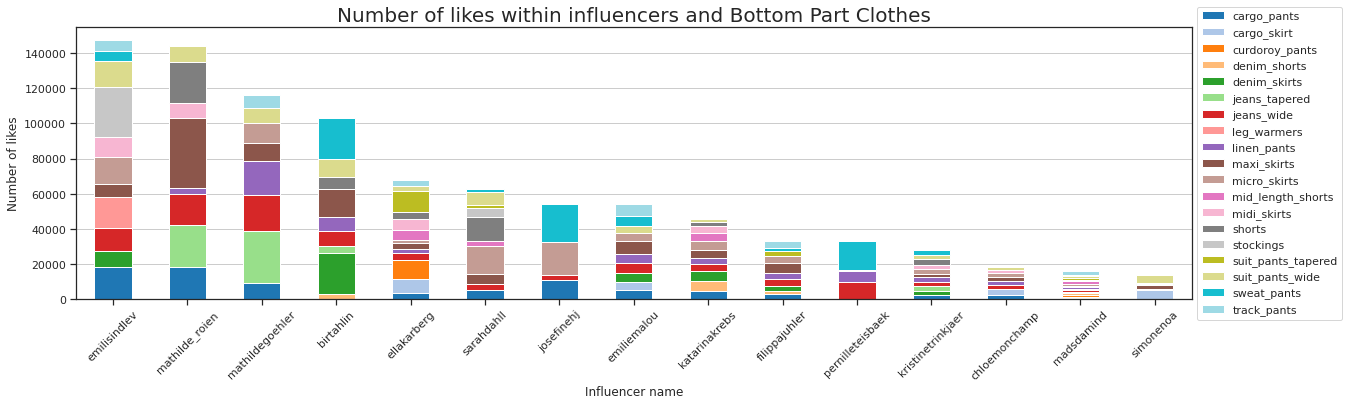

In [77]:
# list_of_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
# list_of_colors = ["#2f4f4f","#2e8b57","#8b0000","#808000","#00008b","#ff0000","#ffa500","#ffff00","#7cfc00","#ba55d3","#e9967a","#00ffff","#0000ff","#ff00ff","#1e90ff","#eee8aa","#dda0dd","#ff1493","#98fb98","#87cefa"]
sorted_pivot_for_likes_within_an_influencer_per_pants.plot.bar(stacked=True,  colormap='tab20', figsize=(20,5))
plt.legend(loc='upper right', title='Type of clothes')
plt.title('Number of likes within influencers and Bottom Part Clothes', fontsize=20)
plt.get_cmap('tab20')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Influencer name")
plt.ylabel("Number of likes")
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

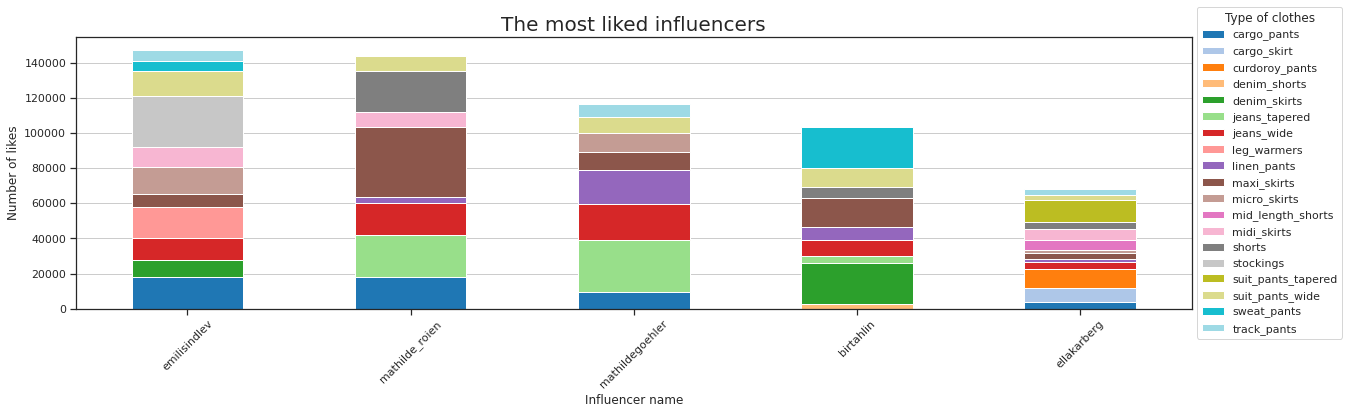

In [78]:
sorted_pivot_for_likes_within_the_top5_influencer_per_pants = sorted_pivot_for_likes_within_an_influencer_per_pants.head()
sorted_pivot_for_likes_within_the_top5_influencer_per_pants.plot.bar(stacked=True,  colormap='tab20', figsize=(20,5))
plt.title('The most liked influencers', fontsize=20)
plt.legend(loc='center left', title='Type of clothes', bbox_to_anchor=(1, 0.5))
plt.xlabel("Influencer name")
plt.ylabel("Number of likes")
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

In [79]:
influencers_dataframe = influencers_dataframe.sort_values(by=['follow_count'], ascending=False)
top5_influencer = influencers_dataframe.head()
top5_influencer = influencers_dataframe.head().iloc[:, 3].tolist()

In [80]:
likes_within_the_top5_influencer_per_pants = likes_within_an_influencer_per_pants.query('insta_handle in @top5_influencer')

In [81]:
cross_tab_prop = pd.crosstab(index=likes_within_the_top5_influencer_per_pants['insta_handle'],
                             columns=likes_within_the_top5_influencer_per_pants['label'],
                             normalize="index")

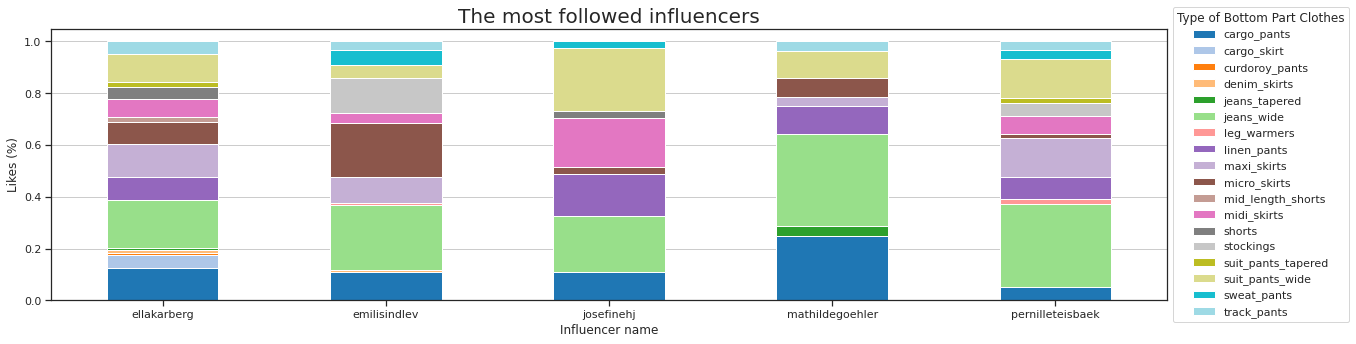

In [82]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20', 
                    figsize=(20,5))

plt.title('The most followed influencers', fontsize=20)
plt.legend(loc='center left', title='Type of Bottom Part Clothes', bbox_to_anchor=(1, 0.5))
plt.xlabel("Influencer name")
plt.ylabel("Likes (%)")
plt.xticks(rotation = 0)
plt.grid(axis = 'y')
plt.show()

In [83]:
pernilleteisbaek  = likes_within_an_influencer_per_pants.loc[likes_within_an_influencer_per_pants['insta_handle'] == 'pernilleteisbaek']
pernilleteisbaek = pernilleteisbaek[['likes', 'label']]
pernilleteisbaek = pernilleteisbaek.groupby(['label'])['likes'].sum()
pernilleteisbaek

label
cargo_pants                9
jeans_wide            184338
leg_warmers                3
linen_pants            32991
maxi_skirts               27
micro_skirts               3
midi_skirts               12
stockings                  9
suit_pants_tapered         3
suit_pants_wide           27
sweat_pants            33370
track_pants                6
Name: likes, dtype: int64

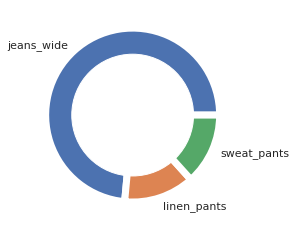

In [84]:
import matplotlib.pyplot as plt

# create data
names = ['jeans_wide', 'linen_pants','sweat_pants']
size = [184338, 32991, 33370]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()